In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nasa-cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/x.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/train_FD002.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD001.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD004.txt
/kaggle/input/nasa-cmaps/CMaps/RUL_FD003.txt
/kaggle/input/nasa-cmaps/CMaps/test_FD001.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/RUL_FD002.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/test_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/Damage Propagation Modeling.pdf
/kaggle/input/nasa-cmaps/cmaps/CMaps/readme.txt
/kaggle/input/nasa-cmaps/cmaps/CMaps/train_FD003.txt
/kaggle/input/nasa-cmaps/cmaps/CM

In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import os
import warnings

# Hide unnecessary warnings for cleaner notebook output
warnings.filterwarnings("ignore")

# Paths for dataset input and output results
DATA_PATH = "/kaggle/input/nasa-cmaps/CMaps/"
SAVE_PATH = "/kaggle/working/"

# Make sure the output folder exists
os.makedirs(SAVE_PATH, exist_ok=True)

# Filepath for the FD001 training data
train_path = os.path.join(DATA_PATH, "train_FD001.txt")

# Column names for the C-MAPSS dataset: 3 settings + 21 sensors
columns = (
    ["engine_id", "time_in_cycles", "op_setting_1", "op_setting_2", "op_setting_3"]
    + [f"sensor_{i}" for i in range(1, 22)]
)

# Load the FD001 training data
train_df_raw = pd.read_csv(train_path, sep=r"\s+", header=None, names=columns)
print(f"Loaded training data: {train_df_raw.shape[0]} rows × {train_df_raw.shape[1]} columns")

Loaded training data: 20631 rows × 26 columns


In [56]:
# Compute the last cycle for each engine
last_cycles = train_df_raw.groupby("engine_id")["time_in_cycles"].max().reset_index()
last_cycles.columns = ["engine_id", "last_cycle"]

# Merge max-cycle info back into main DataFrame
train_df = train_df_raw.merge(last_cycles, on="engine_id", how="left")

# Compute Remaining Useful Life (RUL)
train_df["RUL"] = train_df["last_cycle"] - train_df["time_in_cycles"]

# Drop helper column
train_df.drop(columns=["last_cycle"], inplace=True)
print(" Remaining Useful Life (RUL) column added .")

 Remaining Useful Life (RUL) column added .


In [57]:
train_df

,engine_id,time_in_cycles,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,1


In [58]:
# 1. Calculate standard deviation for each column
std_values = train_df.std()

# 2. Sort and inspect to understand sensor variability
sorted_std = std_values.sort_values()

print("\nStandard deviation of all columns (ascending order):")
for col, val in sorted_std.items():
    print(f"{col:15s} : {val:.10f}")

# 3. Detect features with zero variance
constant_feats = std_values[std_values == 0].index.tolist()

# 4. Detect quasi-constant features (very small variance)
quasi_constant_feats = std_values[(std_values > 0) & (std_values < 1e-2)].index.tolist()

# 5. Combine features to be dropped
to_drop = constant_feats + quasi_constant_feats

# 6. Report findings
if constant_feats:
    print(f"\nFound {len(constant_feats)} constant features: {constant_feats}")
else:
    print("\nNo constant features found.")

if quasi_constant_feats:
    print(f"Found {len(quasi_constant_feats)} quasi-constant features (std < 1e-2): {quasi_constant_feats}")
else:
    print("No quasi-constant features found.")

# 7. Remove these low-variance features if any
if to_drop:
    train_df.drop(columns=to_drop, inplace=True)
    print(f"\nRemoved {len(to_drop)} low-variance features. New shape: {train_df.shape}")
else:
    print("\nNo low-variance features removed.")

# 8. Display remaining column names for verification
print("\nRemaining columns:")
print(train_df.columns.tolist())


Standard deviation of all columns (ascending order):
sensor_19       : 0.0000000000
op_setting_3    : 0.0000000000
sensor_18       : 0.0000000000
sensor_16       : 0.0000000000
sensor_10       : 0.0000000000
sensor_5        : 0.0000000000
sensor_1        : 0.0000000001
op_setting_2    : 0.0002930621
sensor_6        : 0.0013889849
op_setting_1    : 0.0021873134
sensor_15       : 0.0375050380
sensor_8        : 0.0709854789
sensor_13       : 0.0719189157
sensor_21       : 0.1082508747
sensor_20       : 0.1807464279
sensor_11       : 0.2670873986
sensor_2        : 0.5000532701
sensor_12       : 0.7375533922
sensor_7        : 0.8850922577
sensor_17       : 1.5487630246
sensor_3        : 6.1311495197
sensor_4        : 9.0006047805
sensor_14       : 19.0761759760
sensor_9        : 22.0828795251
engine_id       : 29.2276329088
RUL             : 68.8809901772
time_in_cycles  : 68.8809901772

Found 3 constant features: ['op_setting_3', 'sensor_18', 'sensor_19']
Found 7 quasi-constant features (

In [59]:
output_path = "/kaggle/working/train_FD001.csv"
train_df.to_csv(output_path, index=False)

In [60]:
# Define the sensor feature columns (excluding identifiers and target)
sensor_features = [col for col in train_df.columns 
                     if col not in ['unit_nr', 'cycle', 'RUL']]

# Display basic descriptive statistics for the remaining sensor features
train_df[sensor_features].describe().T[['mean', 'std', 'min', 'max']]


,mean,std,min,max
engine_id,51.506568,29.227633,1.0000,100.0000
time_in_cycles,108.807862,68.880990,1.0000,362.0000
sensor_2,642.680934,0.500053,641.2100,644.5300
sensor_3,1590.523119,6.131150,1571.0400,1616.9100
sensor_4,1408.933782,9.000605,1382.2500,1441.4900
sensor_7,553.367711,0.885092,549.8500,556.0600
sensor_8,2388.096652,0.070985,2387.9000,2388.5600
sensor_9,9065.242941,22.082880,9021.7300,9244.5900
sensor_11,47.541168,0.267087,46.8500,48.5300
sensor_12,521.413470,0.737553,518.6900,523.3800


In [61]:
train_df.isnull().sum()

engine_id         0
time_in_cycles    0
sensor_2          0
sensor_3          0
sensor_4          0
sensor_7          0
sensor_8          0
sensor_9          0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_15         0
sensor_17         0
sensor_20         0
sensor_21         0
RUL               0
dtype: int64

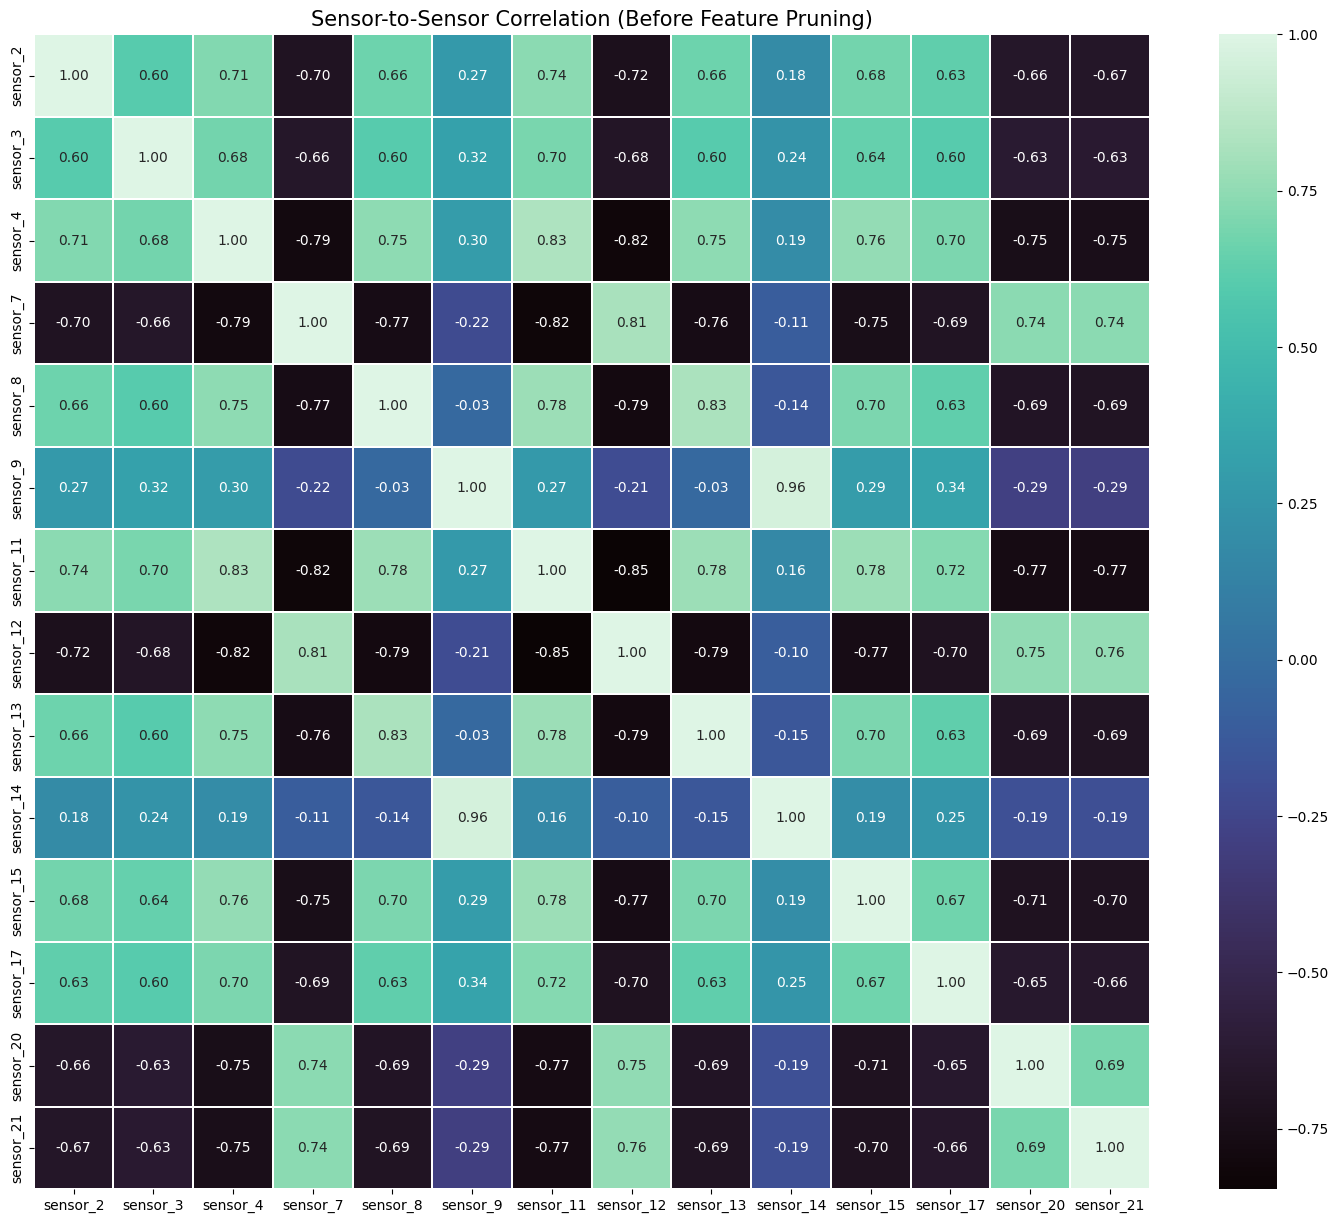

Removing 'sensor_11' — highly correlated with 'sensor_4' (r = 0.83)
Removing 'sensor_11' — highly correlated with 'sensor_7' (r = -0.82)
Removing 'sensor_12' — highly correlated with 'sensor_4' (r = -0.82)
Removing 'sensor_12' — highly correlated with 'sensor_7' (r = 0.81)
Removing 'sensor_12' — highly correlated with 'sensor_11' (r = -0.85)
Removing 'sensor_13' — highly correlated with 'sensor_8' (r = 0.83)
Removing 'sensor_14' — highly correlated with 'sensor_9' (r = 0.96)

Identified 4 redundant sensors (|r| > 0.8): ['sensor_11', 'sensor_12', 'sensor_13', 'sensor_14']
Removed redundant sensors. Updated shape: (20631, 13)


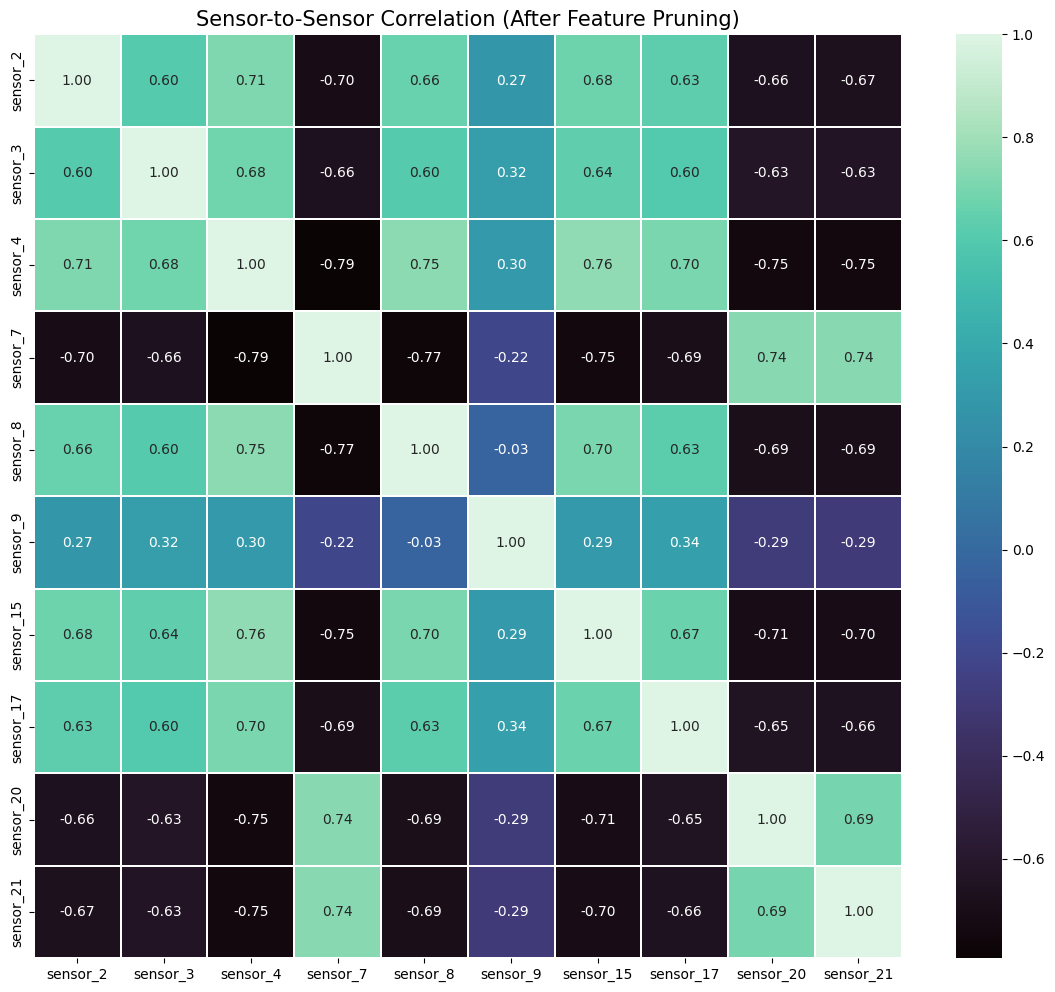

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- Correlation Analysis for Sensor Features ---

# Pick only columns that represent sensor readings
sensor_features = [col for col in train_df.columns if "sensor_" in col]

# Compute the correlation matrix among all sensor columns
corr_matrix = train_df[sensor_features].corr()

# --- Plot correlation matrix (Before removing redundant features) ---
plt.figure(figsize=(18, 15))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="mako",
    linewidths=0.2
)
plt.title("Sensor-to-Sensor Correlation (Before Feature Pruning)", fontsize=15)
plt.show()

# Define correlation threshold above which features are considered redundant
corr_threshold = 0.8
redundant_cols = set()

# Loop over the upper triangle of the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr_value = corr_matrix.iloc[i, j]
        if abs(corr_value) > corr_threshold:
            col_name = corr_matrix.columns[i]
            ref_col = corr_matrix.columns[j]
            print(f"Removing '{col_name}' — highly correlated with '{ref_col}' (r = {corr_value:.2f})")
            redundant_cols.add(col_name)

# Drop redundant sensor columns, if any
if redundant_cols:
    print(f"\nIdentified {len(redundant_cols)} redundant sensors (|r| > {corr_threshold}): {sorted(list(redundant_cols))}")
    train_df.drop(columns=list(redundant_cols), inplace=True)
    print(f"Removed redundant sensors. Updated shape: {train_df.shape}")
else:
    print(f"\nNo redundant sensors found (no correlation above {corr_threshold}).")

# --- Plot correlation matrix again (After removing redundancy) ---
remaining_sensors = [col for col in train_df.columns if "sensor_" in col]
updated_corr = train_df[remaining_sensors].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(
    updated_corr,
    annot=True,
    fmt=".2f",
    cmap="mako",
    linewidths=0.2
)
plt.title("Sensor-to-Sensor Correlation (After Feature Pruning)", fontsize=15)
plt.show()


In [63]:
from sklearn.preprocessing import StandardScaler

# 1. Identify columns to scale
features_to_scale = [col for col in train_df.columns 
                     if col not in ['RUL','engine_id']]

# 2. Initialize scaler
scaler = StandardScaler()

# 3. Fit and transform the selected features
train_df[features_to_scale] = scaler.fit_transform(train_df[features_to_scale])

print(f"Scaled {len(features_to_scale)} features")


Scaled 11 features


In [64]:
import joblib

# Suppose your scaler is called "scaler"
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [65]:
train_df.columns

Index(['engine_id', 'time_in_cycles', 'sensor_2', 'sensor_3', 'sensor_4',
       'sensor_7', 'sensor_8', 'sensor_9', 'sensor_15', 'sensor_17',
       'sensor_20', 'sensor_21', 'RUL'],
      dtype='object')

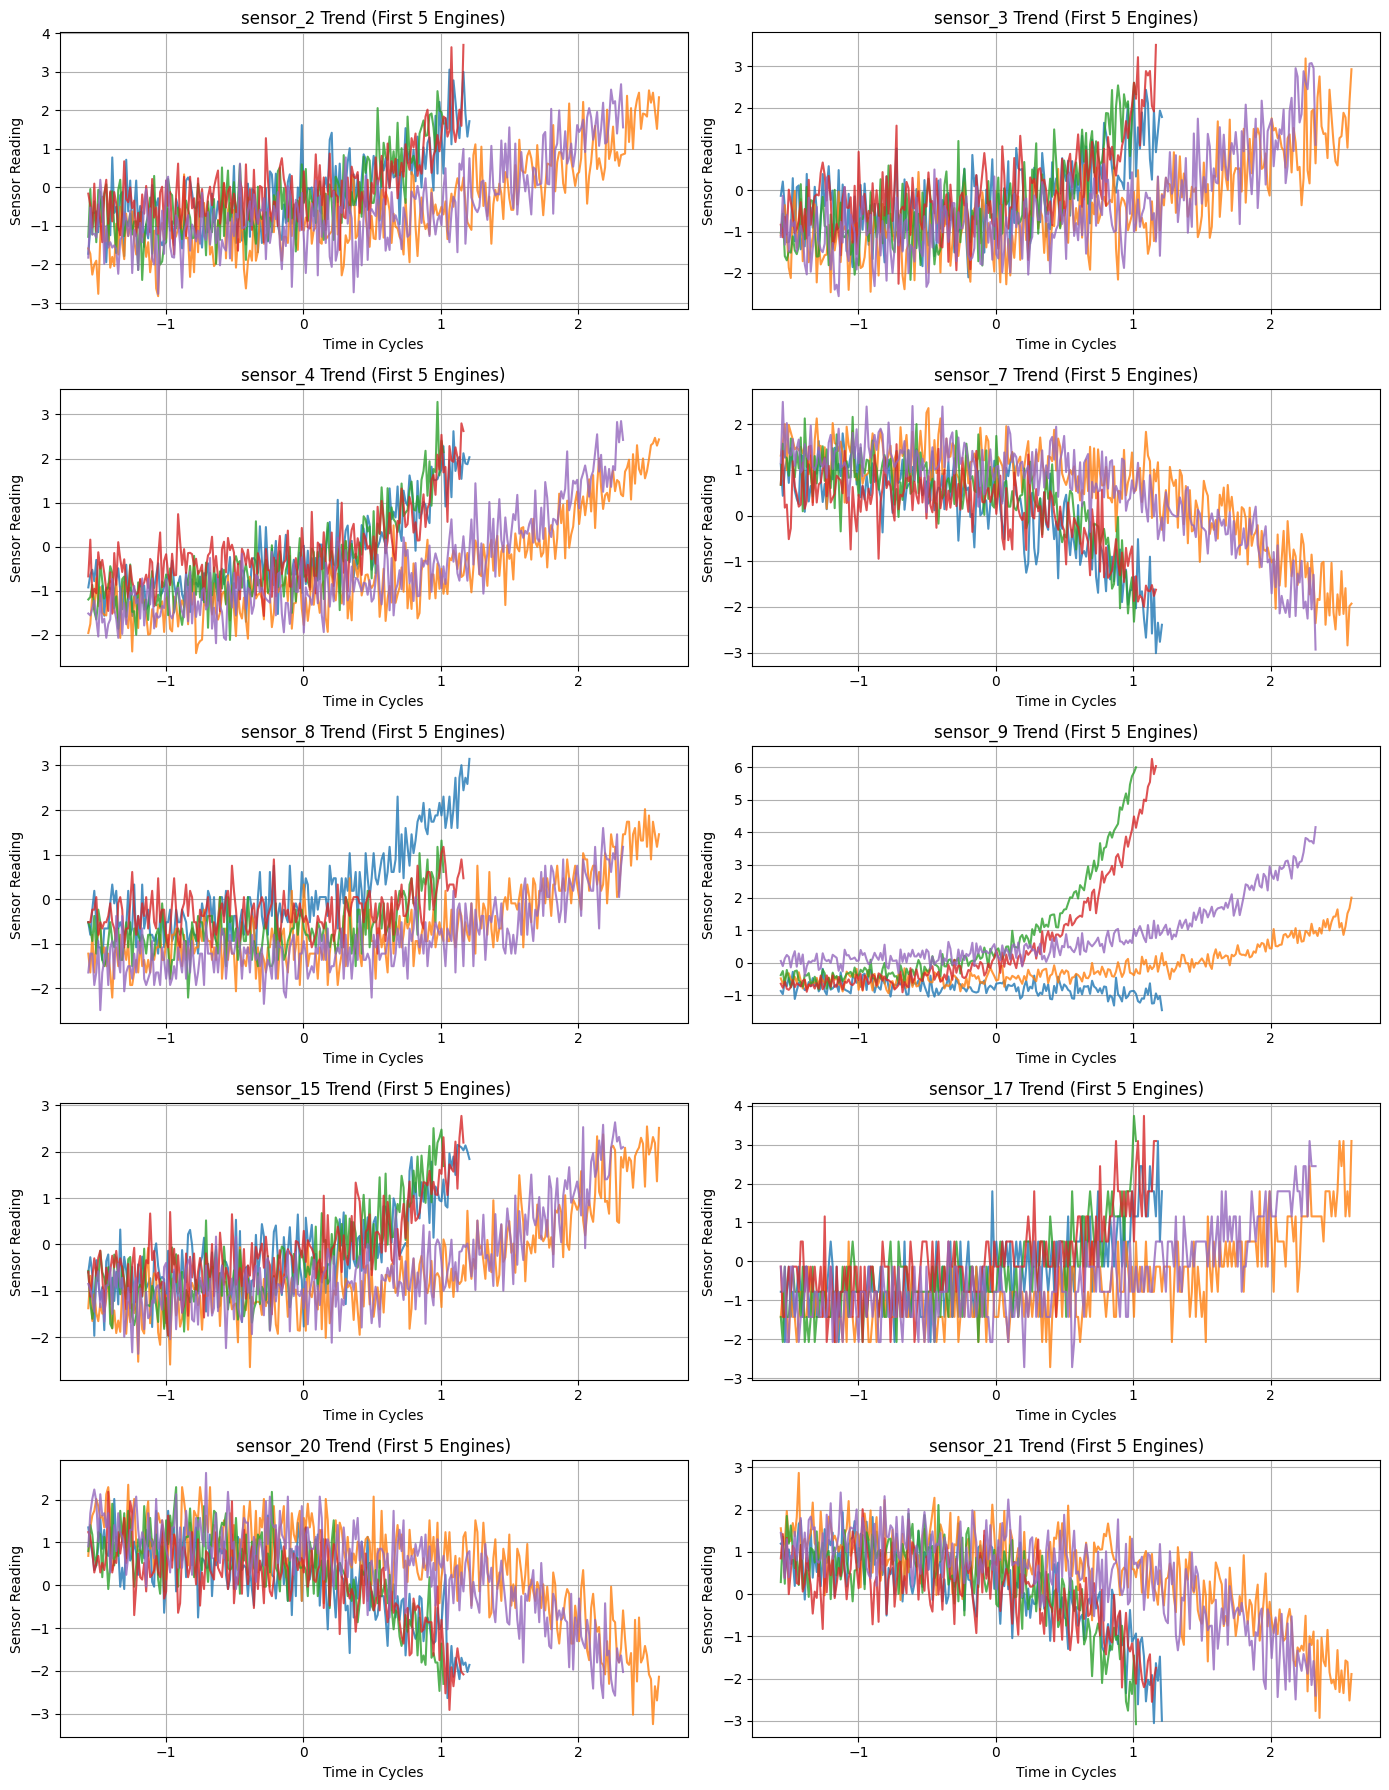

In [66]:
# Select a few engines and sensor columns
sample_engines = train_df["engine_id"].unique()[:5]  # visualize first 5 engines
sensors_to_plot = ['sensor_2', 'sensor_3', 'sensor_4',
                   'sensor_7', 'sensor_8', 'sensor_9', 
                   'sensor_15', 'sensor_17', 'sensor_20', 'sensor_21']

# Create a grid of subplots (2 columns × 5 rows = 10 sensors)
fig, axes = plt.subplots(5, 2, figsize=(14, 18))
axes = axes.flatten()

# Plot each sensor across first 5 engines
for idx, sensor in enumerate(sensors_to_plot):
    ax = axes[idx]
    for eng in sample_engines:
        subset = train_df[train_df["engine_id"] == eng]
        ax.plot(subset["time_in_cycles"], subset[sensor], label=f"Engine {eng}", alpha=0.8)
    ax.set_title(f"{sensor} Trend (First 5 Engines)")
    ax.set_xlabel("Time in Cycles")
    ax.set_ylabel("Sensor Reading")
    ax.grid(True)

plt.tight_layout()
plt.show()


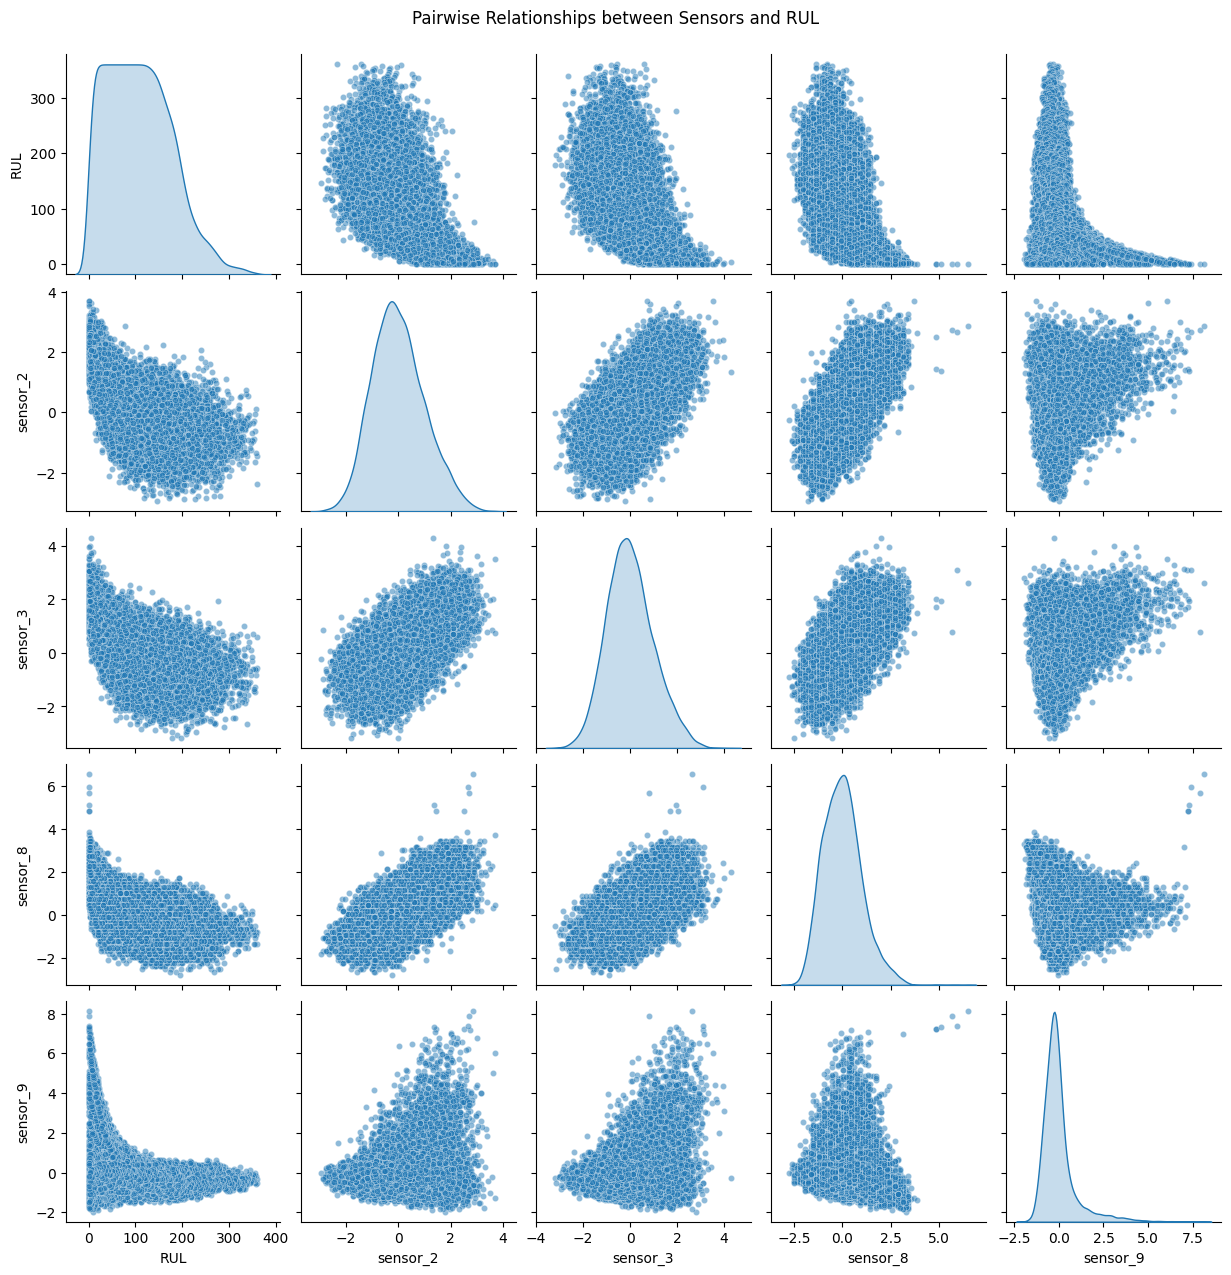

In [67]:
sns.pairplot(
    train_df[["RUL", "sensor_2", "sensor_3", "sensor_8", "sensor_9"]],
    diag_kind="kde",
    plot_kws={"alpha": 0.5, "s": 20}
)
plt.suptitle("Pairwise Relationships between Sensors and RUL", y=1.02)
plt.show()


In [68]:
# Save the processed dataframe as CSV
output_path = "/kaggle/working/processed_train_FD001.csv"
train_df.to_csv(output_path, index=False)

print(f"Processed data saved successfully at: {output_path}")

Processed data saved successfully at: /kaggle/working/processed_train_FD001.csv
